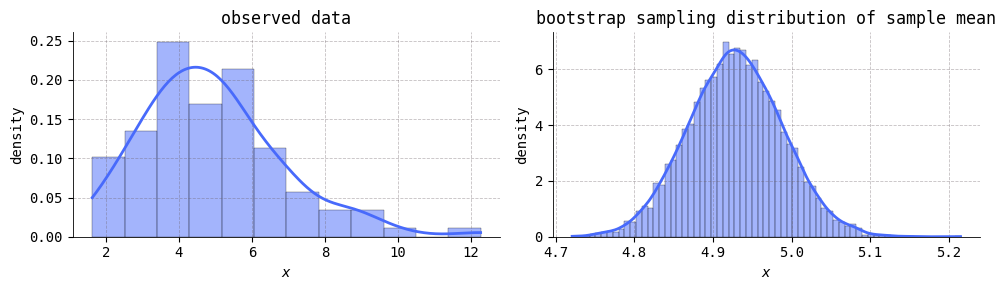

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
#import matplotlib_inline.backend_inline
#import matplotlib.colors as clr
plt.style.use('./aux-files/custom_style_light.mplstyle')
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
blue = '#486AFB'
magenta = '#FD46FC'

np.random.seed(42)
X = sp.stats.gamma(a=5)

sample_size = 100
resample_size = 1000
random_sample = X.rvs(size=sample_size)
replicate_means = []
num_resamples = 10000

for _ in range(num_resamples):
    sample = np.random.choice(a=random_sample, size=resample_size, replace=True)
    replicate_means.append(sample.mean())

_, axes = plt.subplots(ncols=2, figsize=(10, 3))

sns.histplot(x=random_sample, ec='black', stat='density', kde=True, ax=axes[0])
sns.histplot(x=replicate_means, ec='black', stat='density', kde=True, ax=axes[1])
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('density')
axes[0].set_title('observed data')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('density')
axes[1].set_title('bootstrap sampling distribution of sample mean')
plt.tight_layout()

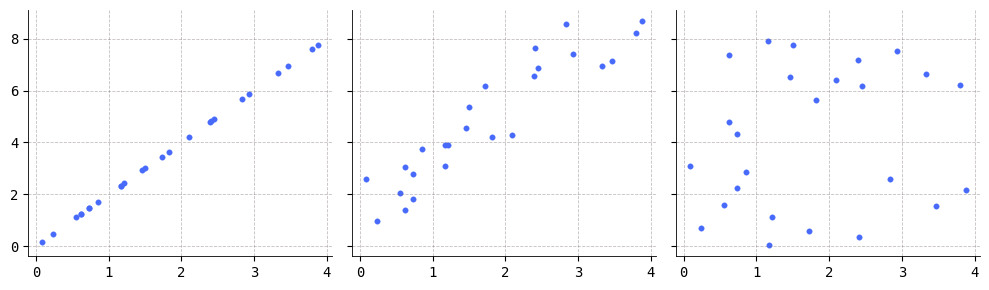

In [2]:
np.random.seed(42)
x = np.random.random(size=25) * 4
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), sharex=True, sharey=True)

y = 2 * x
axes[0].scatter(x, y)

y += np.random.random(size=25) * 3
df = pd.DataFrame({'x': x, 'y': y})
axes[1].scatter(x, y)

y = np.random.random(size=25) * 8
axes[2].scatter(x, y)

plt.tight_layout()

In [46]:
import statsmodels.formula.api as smf

model = smf.ols(formula='y ~ x', data=df)
result = model.fit()

print(result.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
No. Observations:                  25   F-statistic:                     140.9
Covariance Type:            nonrobust   Prob (F-statistic):           2.74e-11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4682      0.340      4.315      0.000       0.764       2.172
x              1.9348      0.163     11.870      0.000       1.598       2.272

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [38]:
from statsmodels.stats.anova import anova_lm

# SSE is contained on the 'residual' line, while SSR is contained on the `x` line
# Summing these gives SST
table = anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,116.933020,116.933020,140.907197,2.744023e-11
Residual,23.0,19.086743,0.829858,NaN,NaN
